{'name': ['Boundaries', 'canopy_0.0', 'trunk_0.0'], 'type': ['scene', 'bbox', 'bbox'], 'normal': [], 'bounds': [[[0, 0, 0], [100, 100, 100]], [[35.714285714285715, 35.714285714285715, 20.0], [64.28571428571429, 64.28571428571429, 60.0]], [[45.0, 45.0, 0], [55.0, 55.0, 20.0]]]}


<IPython.core.display.Javascript object>


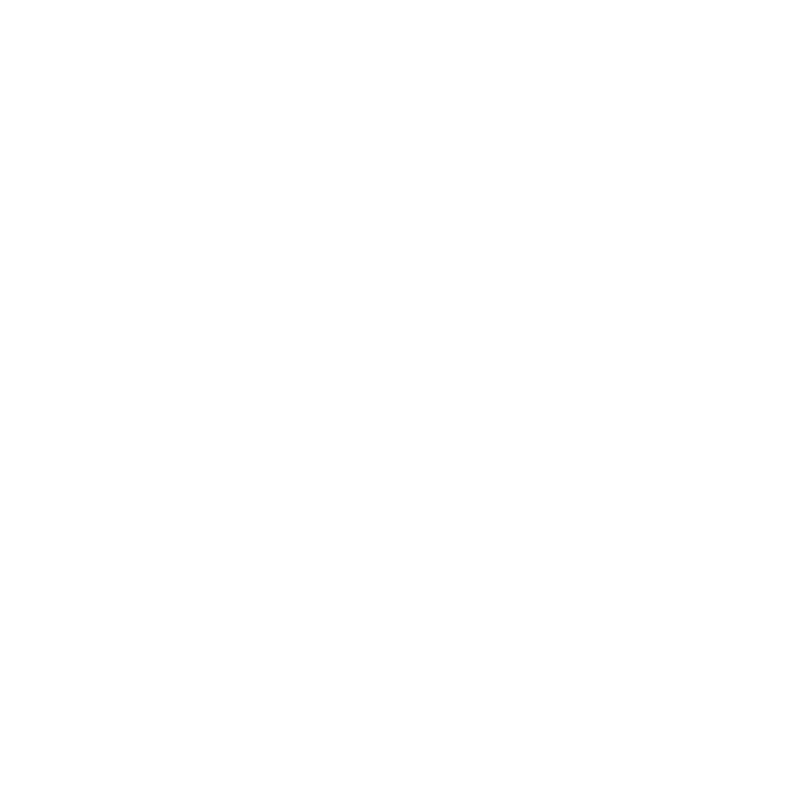

In [1]:
%matplotlib notebook
import plantrt as rt
import scene_conf as conf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from visualise import *

import numpy as np

pars = {'theta_sun':np.pi*.9,
        'phi_sun':2*np.pi/6,
        'nscat': 100,
       'scene_extent':[100,100,100],
       'logfile': 'out.log',
       'nplevels':3}


scene_extent = pars['scene_extent']

scene = conf.default_scene_elements(scene_extent)

print (scene)

idbox = np.where(np.array(scene['type']) == 'bbox')[0]
nboxes = len(idbox)

colors = {'canopy': 'green',
         'trunk': 'brown'}

fig = plt.figure(2,figsize=(8,8))
ax = fig.gca(projection='3d')

if nboxes == 0:
    print ('No bounding boxes found!')
else:
    for ibox in range(nboxes):
        idd  = idbox[ibox]
        size = [[(scene['bounds'][idd][1][x] - scene['bounds'][idd][0][x]) for x in range(3)]]
        ppos  = [[(scene['bounds'][idd][1][x] + scene['bounds'][idd][0][x])/2. - size[0][x]/2.  for x in range(3)]]
        col  = [colors[scene['name'][idd].split('_')[0]]]
        #print (size)
        #print (pos)
        
        #size = [[10,10,10]]
        #pos  = [[10,10,10]]
        
        pc = plotCubeAt(ppos, sizes=size, colors=col,edgecolor="k",linewidth=0.2,alpha=.75)
        ax.add_collection3d(pc)


ax.set_xlim([0,scene_extent[0]])
ax.set_ylim([0,scene_extent[1]])
ax.set_zlim([0,scene_extent[2]])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
nscatter = pars['nscat']

In [2]:
nphotons,pos, scene = rt.run(pars, verbose=True)
print (nphotons)
print (pos[-1])


/home/aaorsi/work/PlantTech/PlantRT/plantrt.py:20: RuntimeWarning: divide by zero encountered in true_divide
  self.invdir = 1./self._dir


5
[array([100.        ,   0.81934404,  29.84602065]), array([100.        ,  25.07995658,  35.33477812]), array([ 0.        , 84.02442479, 14.82995989]), array([61.3340559 ,  0.        , 24.05923464]), array([45.        , 54.74429482, 13.98532622])]


In [3]:
print (len(pos))
pos[0] = [pos[0]]
lpos = [len(x) for x in pos]
print(lpos)
print (pos[0])

462
[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [4]:
pos[0] 
lpos = np.array([len(x) for x in pos])
raycol = plt.cm.Paired(np.linspace(0,1,nphotons))

for ip in range(nphotons):
    sel = np.where(lpos >= ip+1)[0]
    nsel = len(sel)
    
    xpos = [pos[sel[i]][ip][0] for i in range(nsel)]
    ypos = [pos[sel[i]][ip][1] for i in range(nsel)]
    zpos = [pos[sel[i]][ip][2] for i in range(nsel)]

    ax.plot(xpos,ypos,zpos,color=raycol[ip],linewidth=3,label=f'Generation {ip}')
    if ip == 0:
        ax.plot([xpos[0], xpos[0]],[ypos[0],ypos[0]],
                [zpos[0],zpos[0]],color=raycol[ip],marker='o')
    a = Arrow3D([xpos[-2], xpos[-1]], [ypos[-2], ypos[-1]], 
                [zpos[-2], zpos[-1]], mutation_scale=20, 
                lw=1, arrowstyle="-|>",color=raycol[ip])
    ax.add_artist(a)
ax.legend()    

In [5]:
%matplotlib notebook 
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


raydict = {}
id_start = np.zeros(nphotons) # scattering id where each photon emerges
lpos = np.array([len(x) for x in pos])
raycol = plt.cm.Paired(np.linspace(0,1,nphotons))
ik = 0

for ip in range(nphotons):
    sel = np.where(lpos >= ip+1)[0]
    nsel = len(sel)
    print (nsel)
    id_start[ip] = sel[0]
    

id_frame = np.zeros(nphotons) # frame at which photons emerge (converts id_start into frame number)
for ip in range(nphotons):
    sel = np.where(lpos > ip)[0]
    nsel = len(sel)
    
    xpos = [pos[sel[i]][ip][0] for i in range(nsel)]
    ypos = [pos[sel[i]][ip][1] for i in range(nsel)]
    zpos = [pos[sel[i]][ip][2] for i in range(nsel)]
    
    
    d_frame = 5.0
    dd = [np.sqrt((xpos[i+1] - xpos[i])**2 + (ypos[i+1]-ypos[i])**2 + (zpos[i+1]-zpos[i])**2) 
      for i in range(nsel-1)] 

    xf = []
    yf = []
    zf = []

    xf.append(xpos[0])
    yf.append(ypos[0])
    zf.append(zpos[0])

    kf = 0
    for i in range(nsel-1):
        nf = dd[i]/d_frame
        mm = np.array([xpos[i+1]-xpos[i], ypos[i+1]-ypos[i], zpos[i+1]-zpos[i]])/dd[i]

        if ip == 0: # first photon is in all frames
            sel = np.where(i == id_start)[0]
            if len(sel) > 0:
                id_frame[sel] = kf
                print (sel, kf)

        for j in range(int(np.round(nf))):
            xf.append(xpos[i] + d_frame*j*mm[0])
            yf.append(ypos[i] + d_frame*j*mm[1])
            zf.append(zpos[i] + d_frame*j*mm[2])
            kf += 1    
            
                            
    raydict['photon_%d'%ip] =np.array([xf,yf,zf])
    #raydict['photon_%d'%ip] = np.array([[xpos,ypos,zpos], [xpos,ypos,zpos]])
 
nframes = len(raydict['photon_0'][0])
print (nframes)


462
460
451
433
417
[0] 0
[1] 21
[2] 64
[3] 125
[4] 187
1074


/home/aaorsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [6]:
print (id_start)
print (id_frame)


[ 0.  2. 11. 29. 45.]
[  0.  21.  64. 125. 187.]


nphotons 5


<IPython.core.display.Javascript object>


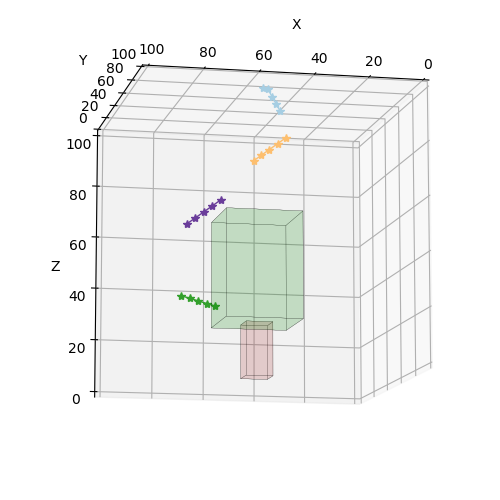

1074


In [7]:
print (f'nphotons {nphotons}')

fig = plt.figure(1234,figsize=(5,5))
ax = p3.Axes3D(fig)
lines = [ax.plot(raydict[x][0, 0:1], raydict[x][1, 0:1], raydict[x][2, 0:1])[0] for x in raydict]
print (nframes)

In [8]:
lines

In [9]:
def update_single_phot(nn, datalines, lines, color='blue'):
#    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
#    i = 0
#    for data, line in zip(datalines, lines):
#        if i == 0:
#            orig = 0 if nn < 1 else nn-1
#            end = nn
#        else:
        orig = 0 if nn < (3*2) else nn-(3*2)
        end = nn if nn < 2 else nn-1
        lines.set_data(datalines[0:2, orig:end])
        lines.set_3d_properties(datalines[2, orig:end])
        #if i == 0:
        lines.set_marker('*')
        #else:
        #    line.set_alpha(0.4-i/20.0)
            
        lines.set_linewidth(1)
        lines.set_color(color)
#        i += 1
        
    
        return lines

def update_ray(num, datalines, lines):
    #print ('hello')
    for ip in range(nphotons):
        if int(num) >= int(id_frame[ip]):
         #   print (f'num-id_frame {num-id_frame[ip]}')
            lines[ip] = update_single_phot(int(int(num)-id_frame[ip]),
                        datalines['photon_%d'%ip], lines[ip], color=raycol[ip])
    
    ax.view_init(elev=10.+30*np.sin(num/100.0), azim=num*0.2)
    
    return lines

In [10]:
# Attaching 3D axis to the figure
#ax.set_aspect('equal')


scene = conf.default_scene_elements(scene_extent)

idbox = np.where(np.array(scene['type']) == 'bbox')[0]
nboxes = len(idbox)

colors = {'canopy': 'green',
         'trunk': 'brown'}


if nboxes == 0:
    print ('No bounding boxes found!')
else:
    for ibox in range(nboxes):
        idd  = idbox[ibox]
        size = [[(scene['bounds'][idd][1][x] - scene['bounds'][idd][0][x]) for x in range(3)]]
        poss  = [[(scene['bounds'][idd][1][x] + scene['bounds'][idd][0][x])/2. - size[0][x]/2.  for x in range(3)]]
        col  = [colors[scene['name'][idd].split('_')[0]]]
        pc = plotCubeAt(poss, sizes=size, colors=col,edgecolor="k",linewidth=0.1, alpha=0.1)
        ax.add_collection3d(pc)


# Setting the axes properties
ax.set_xlim3d([0.0, scene_extent[0]])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, scene_extent[1]])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, scene_extent[2]])
ax.set_zlabel('Z')
#ax.set_axis_off()

#ax.set_title('3D Test')

# Creating the Animation object

line_ani = animation.FuncAnimation(fig, update_ray, nframes, fargs=(raydict, lines),
                                   interval=200, blit=True, repeat=True)

In [11]:
#update_ray(21,raydict, lines)

In [12]:
#print ((raydict['photon_0'][1][2,0:200]))




In [13]:
#line_ani
#line_ani.save('line_animation_3d_funcanimation.gif', writer='imagemagick',fps=40)
#line_ani.save('line_animation_3d_funcanimation.mpg', writer='ffmpeg',fps=10)
